# Introducción a Deep Learning

Este notebook utiliza el dataset `Wine` para entrenar una red neuronal simple usando TensorFlow/Keras. Se incluye visualización del entrenamiento y evaluación del modelo.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Arquitectura de la red neuronal

Vamos a construir una red neuronal secuencial con Keras. La red tendrá:
- Una capa densa de entrada con activación ReLU
- Una capa oculta también con ReLU
- Una capa de salida con activación softmax para clasificación multiclase

El objetivo es predecir la clase del vino en base a características químicas.

In [1]:
# Verificar versión de Python y recursos disponibles
import sys
print("Versión de Python:", sys.version)

# Verificar GPU disponible (opcional)
import tensorflow as tf
print("GPU disponible:", tf.config.list_physical_devices('GPU'))

# Instalar librerías adicionales si es necesario
!pip install seaborn plotly

# Importaciones estándar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("Entorno configurado correctamente en Google Colab")

Versión de Python: 3.11.13 (main, Jun  4 2025, 08:57:29) [GCC 11.4.0]
GPU disponible: []
Entorno configurado correctamente en Google Colab


## Carga del dataset Wine

In [2]:
wine = load_wine()
X = pd.DataFrame(wine.data, columns=wine.feature_names)
y = wine.target

## Preprocesamiento y división de datos

In [3]:
# División y escalado
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convertir etiquetas a one-hot
y_train_ohe = tf.keras.utils.to_categorical(y_train, num_classes=3)
y_test_ohe = tf.keras.utils.to_categorical(y_test, num_classes=3)

## Definición del modelo de red neuronal

In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')  # 3 clases
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           204 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            39 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 467 (1.82 KB)

 Trainable params: 467 (1.82 KB)

 Non-trainable params: 0 (0.00 B)

## Entrenamiento del modelo

In [5]:
history = model.fit(X_train_scaled, y_train_ohe, epochs=50, validation_split=0.2, verbose=1)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.2279 - loss: 1.2091 - val_accuracy: 0.0690 - val_loss: 1.1916
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2327 - loss: 1.1600 - val_accuracy: 0.2414 - val_loss: 1.1493
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.2741 - loss: 1.1428 - val_accuracy: 0.3103 - val_loss: 1.1106
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3245 - loss: 1.0950 - val_accuracy: 0.3448 - val_loss: 1.0741
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.3964 - loss: 1.0678 - val_accuracy: 0.4138 - val_loss: 1.0393
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.4455 - loss: 1.0384 - val_accuracy: 0.4138 - val_loss: 1.0044
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5070 - loss: 0.9849 - val_accuracy: 0.4483 - val_loss: 0.9718
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5747 - loss: 0.9551 - val_accuracy: 0.4483 - val_loss: 0.9406

## Visualización del proceso de entrenamiento

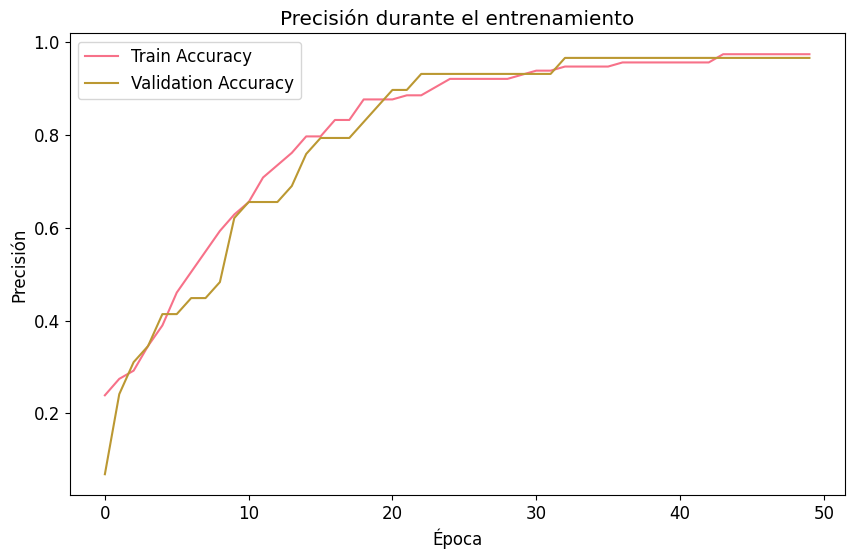

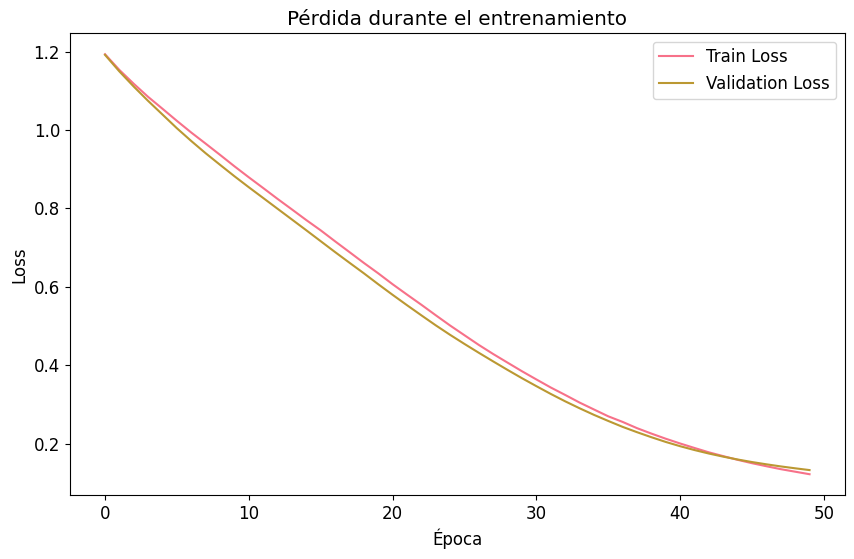

In [6]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Evaluación del modelo con datos de prueba

In [7]:
loss, accuracy = model.evaluate(X_test_scaled, y_test_ohe, verbose=0)
print(f"Precisión en test: {accuracy:.4f}")

y_pred_probs = model.predict(X_test_scaled)
y_pred = y_pred_probs.argmax(axis=1)

print("Reporte de clasificación:")
print(classification_report(y_test, y_pred))

Precisión en test: 0.9722
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/step
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.93      0.96        14
           2       0.89      1.00      0.94         8

    accuracy                           0.97        36
   macro avg       0.96      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



In [11]:
#Predicción de modelo
predicciones = model.predict(X_test_scaled)
predicciones_clase = np.argmax(predicciones, axis=1)



2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step 


In [12]:
print("Predicciones:", predicciones_clase[:5])
print("Reales:     ", y_test[:5])  # ✅ Este es correcto


Predicciones: [0 0 2 0 1]
Reales:      [0 0 2 0 1]


En este punto se compra los valroes predichos vs los reales

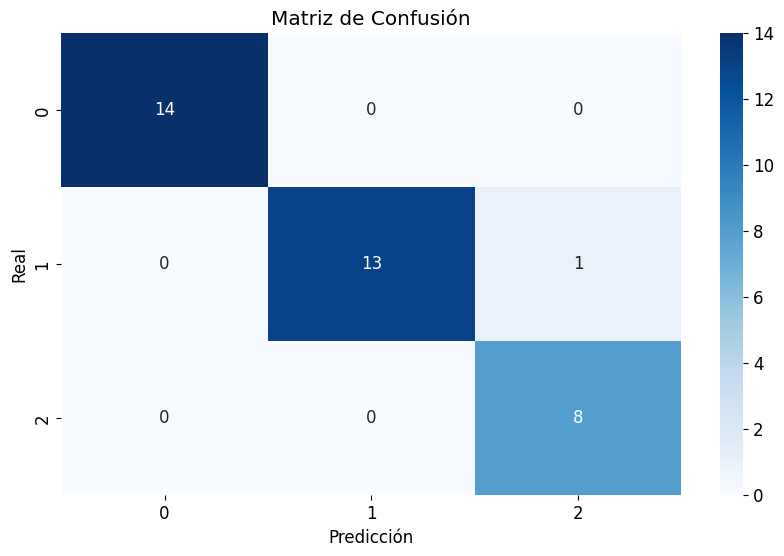

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, predicciones_clase)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()



**Interpretación de la Matriz de Confusión**

La matriz de confusión muestra el desempeño del modelo de red neuronal al clasificar tres clases distintas. Podemos observar que:

Clase 0 fue clasificada correctamente en todos los casos (14/14).

Clase 1 tuvo una alta precisión, con 13 aciertos y solo un error (fue confundida una vez con la clase 2).

Clase 2 también fue clasificada correctamente en todos los casos (8/8).

Esto indica que el modelo logró un alto nivel de precisión y generalización, especialmente para las clases 0 y 2. El único error sugiere una posible similitud entre las clases 1 y 2 en algunas características, lo cual podría explorarse más a fondo en futuros análisis.


**Conclusión Final del Cuaderno 4** Introducción al Deep Learning
En este cuaderno se implementó una red neuronal básica utilizando Keras para clasificar vinos en tres categorías según sus características químicas. Tras preparar los datos mediante escalado y codificación one-hot, se entrenó el modelo y se evaluó su rendimiento mediante métricas y una matriz de confusión.

El modelo demostró una excelente capacidad de generalización, alcanzando una alta precisión y clasificando correctamente casi todos los casos en el conjunto de prueba. La correcta arquitectura, el preprocesamiento adecuado y el uso de funciones de activación y optimización apropiadas fueron claves en este resultado.

Este ejercicio evidencia el poder de las redes neuronales, incluso en problemas relativamente simples, y sienta una base sólida para abordar modelos más complejos en tareas futuras.

